## 获取最佳模型拆分的数据

In [1]:
import pickle
from shap import Explanation
import pandas as pd
import shap
from shap import LinearExplainer, KernelExplainer, Explanation
shap.initjs()
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt

with open('metrics/best_model_item.pkl', 'rb') as f:
    best_model_item = pickle.load(f)
clf_stacking = best_model_item['clf']
best_model_index = best_model_item['index']
print("The index (random state) used for the best model is: ", best_model_index)


The index (random state) used for the best model is:  0


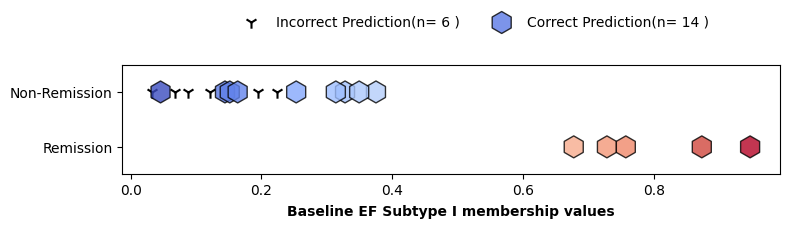

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 读取Excel文件
data = pd.read_excel('隶属度与Remissionoutcome关系.xlsx')

# 计算人数
correct_count = len(data[data['Yture'] == data['Yprediction']])
incorrect_count = len(data[data['Yture'] != data['Yprediction']])

# 创建一个图形和轴
fig, ax = plt.subplots(figsize=(8, 3))

# 绘制正确预测的点
correct_mask = data['Yture'] == data['Yprediction']
correct_data = data.loc[correct_mask]
membership_values = correct_data['Subtype I membership values at vaseline']
color_map = plt.cm.coolwarm
norm = plt.Normalize(vmin=membership_values.min(), vmax=membership_values.max())  # 正常化颜色映射
colors = color_map(norm(membership_values))

# 调换X和Y轴，将Subtype I membership values 放在X轴上
scatter = ax.scatter(correct_data['Subtype I membership values at vaseline'], correct_data['Yprediction'], marker='h', c=colors, label=f'Correct Prediction(n= {correct_count} )', s=250, alpha=0.8, edgecolors='black', zorder=10)

# 绘制错误预测的点
incorrect_mask = data['Yture'] != data['Yprediction']
incorrect_data = data.loc[incorrect_mask]
for _, row in incorrect_data.iterrows():
    if row['Yprediction'] == 0:
        ax.scatter(row['Subtype I membership values at vaseline'], 0, marker='1', color='black', label=f'Incorrect Prediction(n= {incorrect_count} )', s=80)  # 调整尺8
    else:
        ax.scatter(row['Subtype I membership values at vaseline'], 1, marker='1', color='black', label=f'Incorrect Prediction(n= {incorrect_count} )', s=80)

# 设置x轴标签
ax.set_xlabel('Baseline EF Subtype I membership values', labelpad=5, weight='bold')

# 设置y轴标签
ax.set_yticks([0, 1])
ax.set_yticklabels(['Remission', 'Non-Remission'])
ax.set_ylim(-0.5, 1.5)  # 使y轴的刻度居中


# 调整图例的位置
handles, labels = ax.get_legend_handles_labels()
unique_labels = list(set(labels))
unique_handles = [handles[labels.index(label)] for label in unique_labels]
ax.legend(unique_handles, unique_labels, loc='upper right', bbox_to_anchor=(0.9, 1.5), borderaxespad=0., fontsize=10, frameon=False, title_fontsize=8, facecolor='none', edgecolor='black', framealpha=1, scatterpoints=1, ncol=2)  

# 显示图形
plt.tight_layout()

# 保存图像
plt.savefig('./image/Remission_vs_EF_SubtypeI_Baseline.jpg', dpi=1200, bbox_inches='tight')
plt.show()

In [117]:

# 计算remission和non-remission的正确预测和错误预测的人数和百分比
remission_mask = data['Yture'] == 1
nonremission_mask = data['Yture'] == 0

total_remission = remission_mask.sum()
total_nonremission = nonremission_mask.sum()

correct_remission = ((data['Yture'] == 1) & (data['Yprediction'] == 1)).sum()
incorrect_remission = ((data['Yture'] == 1) & (data['Yprediction'] == 0)).sum()

correct_nonremission = ((data['Yture'] == 0) & (data['Yprediction'] == 0)).sum()
incorrect_nonremission = ((data['Yture'] == 0) & (data['Yprediction'] == 1)).sum()

correct_remission_percentage = (correct_remission / total_remission) * 100
incorrect_remission_percentage = (incorrect_remission / total_remission) * 100

correct_nonremission_percentage = (correct_nonremission / total_nonremission) * 100
incorrect_nonremission_percentage = (incorrect_nonremission / total_nonremission) * 100

print(f"Remission:")
print(f"  Total: {total_remission}")
print(f"  Correct Predictions: {correct_remission} ({correct_remission_percentage:.2f}%)")
print(f"  Incorrect Predictions: {incorrect_remission} ({incorrect_remission_percentage:.2f}%)")

print(f"\nNon-Remission:")
print(f"  Total: {total_nonremission}")
print(f"  Correct Predictions: {correct_nonremission} ({correct_nonremission_percentage:.2f}%)")
print(f"  Incorrect Predictions: {incorrect_nonremission} ({incorrect_nonremission_percentage:.2f}%)")

Remission:
  Total: 9
  Correct Predictions: 9 (100.00%)
  Incorrect Predictions: 0 (0.00%)

Non-Remission:
  Total: 11
  Correct Predictions: 5 (45.45%)
  Incorrect Predictions: 6 (54.55%)


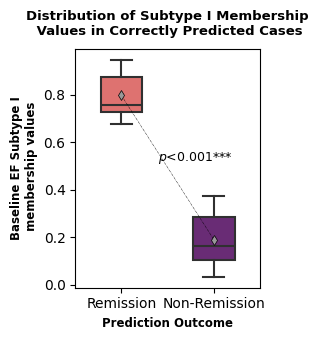


Statistics for Remission:
Number of cases: 5
Mean: 0.797
Median: 0.757
Standard deviation: 0.111

Statistics for Non-Remission:
Number of cases: 15
Mean: 0.190
Median: 0.164
Standard deviation: 0.113


In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 读取Excel文件
data = pd.read_excel('隶属度与Remissionoutcome关系.xlsx')

# 设置图形大小
plt.figure(figsize=(2.8, 3.5))

# 创建箱线图
sns.boxplot(x='Yprediction', y='Subtype I membership values at vaseline', 
            data=data,
            palette='magma_r',
            width=0.45)

# 计算两组的均值
means = []
for i, outcome in enumerate([0, 1]):
    subset = data[data['Yprediction'] == outcome]
    mean_value = subset['Subtype I membership values at vaseline'].mean()
    means.append(mean_value)
    plt.plot(i, mean_value, 'd', color='#999999', markersize=5, markeredgecolor='black', markeredgewidth=0.5, zorder=10)

# 添加虚线连接和显著性标记
y_max = max(means) + 0.1  # 调整线的高度
plt.plot([0, 1], [means[0], means[1]], '-.', color='black', linewidth=0.3, zorder=9)
plt.text(0.8, 0.5, '$p$<0.001***', ha='center', va='bottom', fontsize=9)

# 设置标签
plt.xlabel('Prediction Outcome', fontsize=8.5, fontweight='bold')
plt.ylabel('Baseline EF Subtype I\n membership values', fontsize=8.5, fontweight='bold')

# 设置x轴刻度标签
plt.xticks([0, 1], ['Remission', 'Non-Remission'])

# 添加标题
plt.title('Distribution of Subtype I Membership\n Values in Correctly Predicted Cases', 
          pad=10, fontsize=9.5, fontweight='bold')

# 优化布局
plt.tight_layout()

# 保存图像
plt.savefig('./image/Remission_Boxplot.jpg', dpi=1200, bbox_inches='tight')
plt.show()

# 计算并打印一些基本统计信息
for outcome in [0, 1]:
    subset = data[data['Yprediction'] == outcome]
    print(f"\nStatistics for {'Remission' if outcome == 0 else 'Non-Remission'}:")
    print(f"Number of cases: {len(subset)}")
    print(f"Mean: {subset['Subtype I membership values at vaseline'].mean():.3f}")
    print(f"Median: {subset['Subtype I membership values at vaseline'].median():.3f}")
    print(f"Standard deviation: {subset['Subtype I membership values at vaseline'].std():.3f}")